<a href="https://colab.research.google.com/github/Pisit056/LabCSD2301/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ชื่อไฟล์ข้อมูลที่ใช้

ชุดข้อมูลปริมาณน้ำฝนประเทศไทย-1.csv =  ปริมาณน้ำฝน

ปริมาณข้าวโพดปี60.xlsx = ปริมาณข้าวโพดปี2560

ปริมาณข้าวโพดปี61.xlsx = ปริมาณข้าวโพดปี2561


In [59]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    print(f"Model: {model_name}")
    print(f"R-squared: {round(r2,2)}")
    print(f"Mean Square Error: {round(mse,2)}")
    print(f"Root Mean Square Error: {round(rmse,2)}")
    print("")
    toRe = {
      'modelName' : model_name,
      'r2' : r2,
      'mse' : mse,
      'rmse' : rmse,
    }
    return toRe

#1. นำเข้าไลบรารี่มาใช้งาน (Import Library)

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#2.ทำการจัดเตรียมข้อมูลที่ใช้

##ข้อมูลปริมาณข้าวโพดปี62
resource: (https://data.go.th/dataset/corn62)

เกี่ยวกับข้อมูล

 จังหวัด

 ผลผลิต(ตัน)

 สัดส่วน

 เนื้อที่เก็บเกี่ยว(ไร่)

 ผลผลิตต่อเนื่องที่เก็บเกี่ยว

In [61]:
#ข้อมูลปริมาณข้าวโพดปี62
corn_62 = pd.read_csv('https://raw.githubusercontent.com/Pisit056/LabCSD2301/master/%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B9%82%E0%B8%9E%E0%B8%94%E0%B8%9B%E0%B8%B562.csv')
corn_62.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,เพชรบูรณ์,"663,268",13%,"848,251",781.92
1,นครราชสีมา,"549,088",11%,"707,300",776.32
2,น่าน,"460,954",9%,"665,244",692.91
3,ตาก,"416,351",8%,"565,063",736.82
4,เลย,"345,580",7%,"484,694",712.99


##ข้อมูลปริมาณข้าวโพดปี61
resource: (https://data.go.th/dataset/oae0024_2561)

เกี่ยวกับข้อมูล

 จังหวัด

 ผลผลิต(ตัน)

 สัดส่วน

 เนื้อที่เก็บเกี่ยว(ไร่)

 ผลผลิตต่อเนื่องที่เก็บเกี่ยว

In [62]:
#ข้อมูลปริมาณข้าวโพดปี61
corn_61 = pd.read_csv('https://raw.githubusercontent.com/Pisit056/LabCSD2301/master/%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B9%82%E0%B8%9E%E0%B8%94%E0%B8%9B%E0%B8%B561.csv')
corn_61.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,เพชรบูรณ์,"640,803",13%,"858,800",746.16
1,นครราชสีมา,"515,947",10%,"714,028",722.59
2,น่าน,"457,622",9%,"671,970",681.02
3,ตาก,"405,318",8%,"557,263",727.34
4,เลย,"332,438",7%,"489,005",679.83


##ข้อมูลปริมาณน้ำฝน
resource: (https://digi.data.go.th/showcase/thailand-rainfall-data/)

เกี่ยวกับข้อมูล


ProvinceID = รหัสจังหวัด

ProvinceName = ชื่อจังหวัด(ไทย)

ProvinceName 2 = ชื่อจังหวัด(อังกฤษ)

MinRain = ปริมาณน้ำฝนต่ำสุดต่อเดือน

MaxRain = ปริมาณน้ำฝนสูงสุดต่อเดือน

AvgRain = ปริมาณน้ำฝนเฉลี่ยต่อเดือน

region = ภูมิภาคของประเทศไทย

Year =ปีที่บันทึกข้อมูลปริมาณน้ำฝน

Month = ลำดับที่ของเดือน

Date = วันที่บันทึก

Month_TH = ชื่อเดือนไทย

In [63]:
#ข้อมูลปริมาณน้ำฝน
rain_data = pd.read_csv('https://raw.githubusercontent.com/Pisit056/LabCSD2301/master/%E0%B8%8A%E0%B8%B8%E0%B8%94%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B8%9D%E0%B8%99%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2-1.csv')
rain_data

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
4230,92,ตรัง,Trang,158.050003,433.649994,293.423136,ใต้,2022,7,1/7/22,กรกฎาคม
4231,93,พัทลุง,Phatthalung,101.309998,264.140015,144.777569,ใต้,2022,7,1/7/22,กรกฎาคม
4232,94,ปัตตานี,Pattani,127.589996,214.440002,172.280939,ใต้,2022,7,1/7/22,กรกฎาคม
4233,95,ยะลา,Yala,122.440002,189.169998,148.495964,ใต้,2022,7,1/7/22,กรกฎาคม


#3.การกลั่นกรองข้อมูล

##ตรวจสอบความผิดปกติของข้อมูลทั้งหมด

In [64]:
corn_62.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   จังหวัด                           48 non-null     object 
 1   ผลผลิต(ตัน)                       48 non-null     object 
 2   สัดส่วน                           48 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           48 non-null     object 
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  48 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.0+ KB


In [65]:
corn_61.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   จังหวัด                           48 non-null     object 
 1   ผลผลิต(ตัน)                       48 non-null     object 
 2   สัดส่วน                           48 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           48 non-null     object 
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  48 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.0+ KB


In [66]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


##ทำการรวมข้อมูลของปริมาณข้าวโพดปี60เเละ61

In [67]:
corn_all = pd.concat([corn_62,corn_61,], ignore_index=True)
corn_all

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,เพชรบูรณ์,"663,268",13%,"848,251",781.92
1,นครราชสีมา,"549,088",11%,"707,300",776.32
2,น่าน,"460,954",9%,"665,244",692.91
3,ตาก,"416,351",8%,"565,063",736.82
4,เลย,"345,580",7%,"484,694",712.99
...,...,...,...,...,...
91,มุกดาหาร,441,0%,904,487.83
92,นครพนม,414,0%,735,563.27
93,ประจวบคีรีขันธ์,350,0%,560,625.00
94,ยโสธร,337,0%,651,517.67


##เปลี่ยนชื่อcolumnให้สอดคล้องกัน

In [68]:
corn_all.rename(columns={'จังหวัด': 'ProvinceName',
                          'ผลผลิต(ตัน)': 'product(ton)',
                          'สัดส่วน': 'proportion',
                          'เนื้อที่เก็บเกี่ยว(ไร่)': 'area',
                          'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)': 'product_area(kk.)'},
                 inplace=True)
corn_all

,ProvinceName,product(ton),proportion,area,product_area(kk.)
0,เพชรบูรณ์,"663,268",13%,"848,251",781.92
1,นครราชสีมา,"549,088",11%,"707,300",776.32
2,น่าน,"460,954",9%,"665,244",692.91
3,ตาก,"416,351",8%,"565,063",736.82
4,เลย,"345,580",7%,"484,694",712.99
...,...,...,...,...,...
91,มุกดาหาร,441,0%,904,487.83
92,นครพนม,414,0%,735,563.27
93,ประจวบคีรีขันธ์,350,0%,560,625.00
94,ยโสธร,337,0%,651,517.67


##เเปลชนิดของข้อมูล

In [69]:
# กำจัดเครื่องหมาย (,) และเปลี่ยนชนิดข้อมูลให้เป็น float
corn_all['product(ton)'] = corn_all['product(ton)'].str.replace(',', '').astype(float)
corn_all['proportion'] = corn_all['proportion'].str.replace('%', '').astype(float)
corn_all['area'] = corn_all['area'].str.replace(',', '').astype(float)

In [70]:
corn_all.dtypes

ProvinceName          object
product(ton)         float64
proportion           float64
area                 float64
product_area(kk.)    float64
dtype: object

In [71]:
corn_all.head()

,ProvinceName,product(ton),proportion,area,product_area(kk.)
0,เพชรบูรณ์,663268.0,13.0,848251.0,781.92
1,นครราชสีมา,549088.0,11.0,707300.0,776.32
2,น่าน,460954.0,9.0,665244.0,692.91
3,ตาก,416351.0,8.0,565063.0,736.82
4,เลย,345580.0,7.0,484694.0,712.99


##จัดการOutlier

In [72]:
corn_all = corn_all[(corn_all['product(ton)'] > 10000) & (corn_all['product(ton)'] < 100000)]
corn_all

,ProvinceName,product(ton),proportion,area,product_area(kk.)
16,สระแก้ว,85931.0,2.0,106915.0,803.73
17,ชัยภูมิ,78162.0,2.0,107132.0,729.59
18,กำแพงเพชร,63371.0,1.0,84667.0,748.47
19,กาญจนบุรี,62179.0,1.0,83951.0,740.66
20,ลำพูน,59602.0,1.0,79532.0,749.41
21,อุบลราชธานี,55998.0,1.0,74848.0,748.16
22,สุโขทัย,47390.0,1.0,66960.0,707.74
23,แม่ฮ่องสอน,45809.0,1.0,63098.0,726.00
24,สุพรรณบุรี,36400.0,1.0,46947.0,775.34
25,พิจิตร,30918.0,1.0,42565.0,726.37


##ทำการกรองข้อมูลปริมาณน้ำฝน

In [73]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


In [74]:
# เลือกชุดข้อมูล เอาข้อมูลตั้งแต่มี ค.ศ.2018 - 2019
rain_data = rain_data[(rain_data['Year'] >= 2018) & (rain_data['Year'] <= 2019)]
rain_data

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
1843,92,ตรัง,Trang,32.820000,133.679993,82.095990,ใต้,2019,12,1/12/19,ธันวาคม
1844,93,พัทลุง,Phatthalung,80.230003,231.639999,161.212878,ใต้,2019,12,1/12/19,ธันวาคม
1845,94,ปัตตานี,Pattani,74.900002,185.279999,126.667670,ใต้,2019,12,1/12/19,ธันวาคม
1846,95,ยะลา,Yala,96.540001,189.539993,150.639460,ใต้,2019,12,1/12/19,ธันวาคม


In [75]:
## รวมกลุ่มข้อมูลปริมาณน้ำฝนจากรายเดือนเป็นรายปี ตาม ปี, รหัสจังหวัด, ชื่อจังหวัด และ ภูมิภาค และหาผลรวมของค่าเฉลี่ยน้ำฝน
rain_group = rain_data.groupby(['Year','ProvinceID','ProvinceName','region'])['AvgRain'].sum().reset_index()
rain_group['AvgRain'] = rain_group['AvgRain'] / 12
rain_group

,Year,ProvinceID,ProvinceName,region,AvgRain
0,2018,10,กรุงเทพมหานคร,กลาง,138.175537
1,2018,11,สมุทรปราการ,กลาง,124.844423
2,2018,12,นนทบุรี,กลาง,139.236354
3,2018,13,ปทุมธานี,กลาง,130.418686
4,2018,14,พระนครศรีอยุธยา,กลาง,103.856999
...,...,...,...,...,...
149,2019,92,ตรัง,ใต้,159.257380
150,2019,93,พัทลุง,ใต้,142.746021
151,2019,94,ปัตตานี,ใต้,144.838248
152,2019,95,ยะลา,ใต้,157.685052


#4.ทำการผสานชุดข้อมูลปริมาณน้ำฝนกับชุดข้อมูลปริมาณข้าวโพดเข้าด้วยกัน

In [76]:
corn_all.shape

(26, 5)

In [77]:
rain_group.shape

(154, 5)

In [78]:
# รวมชุดข้อมูลโดยใช้ merge และ group ตามชื่อจังหวัด
corn_merge = rain_group.merge(corn_all,on=['ProvinceName'])
corn_merge

,Year,ProvinceID,ProvinceName,region,AvgRain,product(ton),proportion,area,product_area(kk.)
0,2018,25,ปราจีนบุรี,ตะวันออก,162.585384,17502.0,0.0,22338.0,783.51
1,2018,25,ปราจีนบุรี,ตะวันออก,162.585384,14111.0,0.0,18728.0,753.47
2,2019,25,ปราจีนบุรี,ตะวันออก,121.517528,17502.0,0.0,22338.0,783.51
3,2019,25,ปราจีนบุรี,ตะวันออก,121.517528,14111.0,0.0,18728.0,753.47
4,2018,27,สระแก้ว,ตะวันออก,132.753153,85931.0,2.0,106915.0,803.73
5,2018,27,สระแก้ว,ตะวันออก,132.753153,84976.0,2.0,112483.0,755.46
6,2019,27,สระแก้ว,ตะวันออก,102.748194,85931.0,2.0,106915.0,803.73
7,2019,27,สระแก้ว,ตะวันออก,102.748194,84976.0,2.0,112483.0,755.46
8,2018,33,ศรีสะเกษ,ตะวันออกเฉียงเหนือ,118.765812,27742.0,1.0,35446.0,782.66
9,2018,33,ศรีสะเกษ,ตะวันออกเฉียงเหนือ,118.765812,21981.0,0.0,29019.0,757.47


#5.เลือก Features ที่จำเป็นในการวิเคราะห์

In [79]:
corn_full = corn_merge[['AvgRain','product(ton)','area','product_area(kk.)']]
corn_full

,AvgRain,product(ton),area,product_area(kk.)
0,162.585384,17502.0,22338.0,783.51
1,162.585384,14111.0,18728.0,753.47
2,121.517528,17502.0,22338.0,783.51
3,121.517528,14111.0,18728.0,753.47
4,132.753153,85931.0,106915.0,803.73
5,132.753153,84976.0,112483.0,755.46
6,102.748194,85931.0,106915.0,803.73
7,102.748194,84976.0,112483.0,755.46
8,118.765812,27742.0,35446.0,782.66
9,118.765812,21981.0,29019.0,757.47


## การหาค่า outlier และการกำจัดค่า outlier

In [80]:
def IQR_Outlier_Detection(corn_all, col):
    q1, q3 = np.percentile(corn_all[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return upper_bound, lower_bound

In [81]:
def fillNull(corn_all, col):
  mean_value = corn_all[col].mean()
  corn_all[col].fillna(mean_value, inplace=True)

In [82]:
def outlierToNull(corn_all, col, upper, lower):
 corn_all[col] = corn_all[col].mask((corn_all[col] > upper) | (corn_all[col] < lower), np.nan)

In [83]:
# !edit def outlier
def complete_outlier(corn_all, col):
  print('')
  upper_limit, lower_limit = IQR_Outlier_Detection(corn_all, col)
  outlierToNull(corn_all, col, upper_limit, lower_limit)
  fillNull(corn_all, col)

### Outlier product(ton)

In [84]:
corn_full.head()

,AvgRain,product(ton),area,product_area(kk.)
0,162.585384,17502.0,22338.0,783.51
1,162.585384,14111.0,18728.0,753.47
2,121.517528,17502.0,22338.0,783.51
3,121.517528,14111.0,18728.0,753.47
4,132.753153,85931.0,106915.0,803.73


<Axes: >

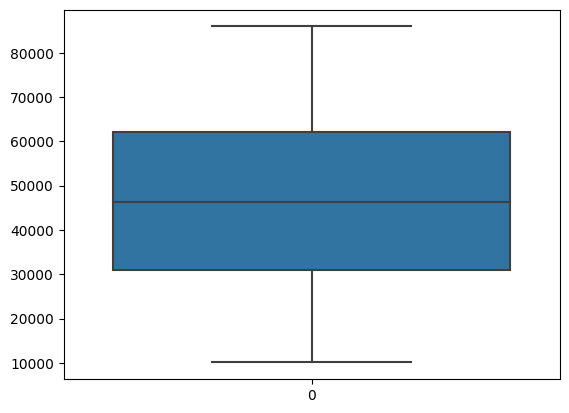

In [85]:
sns.boxplot(corn_full['product(ton)'])

In [86]:
complete_outlier(corn_full, 'product(ton)')

<ipython-input-82-906311137a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_all[col] = corn_all[col].mask((corn_all[col] > upper) | (corn_all[col] < lower), np.nan)
<ipython-input-81-7493eb7f4895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_all[col].fillna(mean_value, inplace=True)


### Outlier HarvArea

<Axes: >

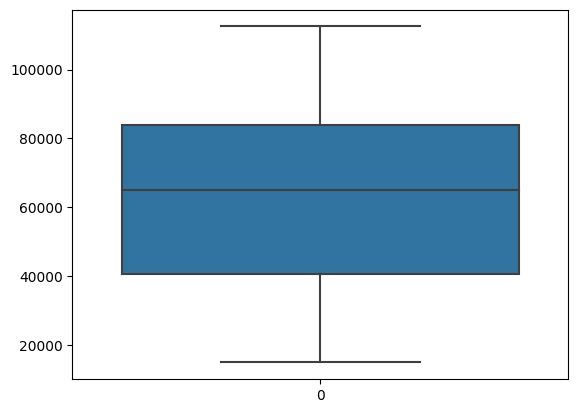

In [87]:
sns.boxplot(corn_full['area'])

In [88]:
complete_outlier(corn_full, 'area')

<ipython-input-82-906311137a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_all[col] = corn_all[col].mask((corn_all[col] > upper) | (corn_all[col] < lower), np.nan)
<ipython-input-81-7493eb7f4895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_all[col].fillna(mean_value, inplace=True)


### Outlier Avg

<Axes: >

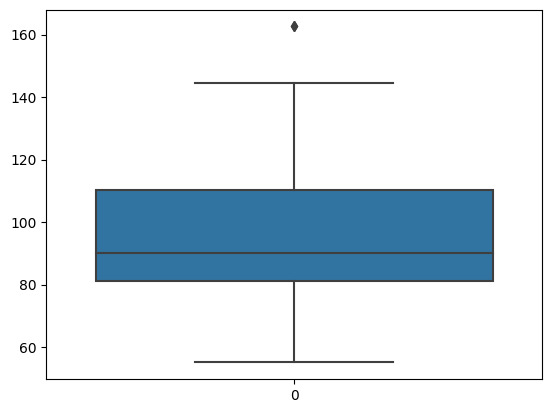

In [89]:
sns.boxplot(corn_full['AvgRain'])

In [90]:
complete_outlier(corn_full, 'AvgRain')

<ipython-input-82-906311137a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_all[col] = corn_all[col].mask((corn_all[col] > upper) | (corn_all[col] < lower), np.nan)
<ipython-input-81-7493eb7f4895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_all[col].fillna(mean_value, inplace=True)


### Outlier ProdPerHarvArea

<Axes: >

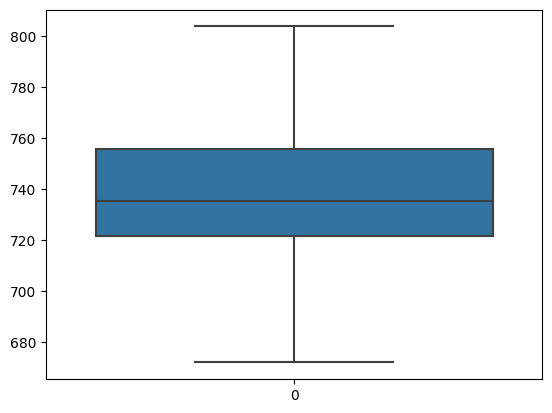

In [91]:
sns.boxplot(corn_full['product_area(kk.)'])

In [92]:
complete_outlier(corn_full, 'product_area(kk.)')

<ipython-input-82-906311137a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_all[col] = corn_all[col].mask((corn_all[col] > upper) | (corn_all[col] < lower), np.nan)
<ipython-input-81-7493eb7f4895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_all[col].fillna(mean_value, inplace=True)


In [93]:
corn_full.head(5)

,AvgRain,product(ton),area,product_area(kk.)
0,95.545920,17502.0,22338.0,783.51
1,95.545920,14111.0,18728.0,753.47
2,121.517528,17502.0,22338.0,783.51
3,121.517528,14111.0,18728.0,753.47
4,132.753153,85931.0,106915.0,803.73


##หาความสัมพันธ์ของข้อมูลระหว่าง Features

In [94]:
corn_full.corr()

,AvgRain,product(ton),area,product_area(kk.)
AvgRain,1.000000,-0.037013,-0.077112,0.446260
product(ton),-0.037013,1.000000,0.996371,0.153721
area,-0.077112,0.996371,1.000000,0.082614
product_area(kk.),0.446260,0.153721,0.082614,1.000000


In [135]:
corn_full.to_csv('corn_dataset.csv', index=False) #ทำการโหลดไฟล์ข้อมูลที่ผ่านการpreprocessingเป็นcsv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

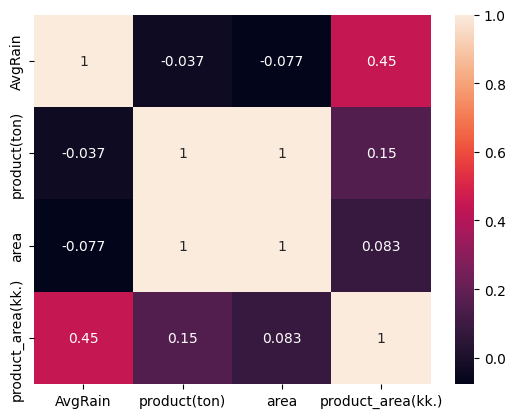

In [95]:
sns.heatmap(corn_full.corr(), annot=True)
plt.show()

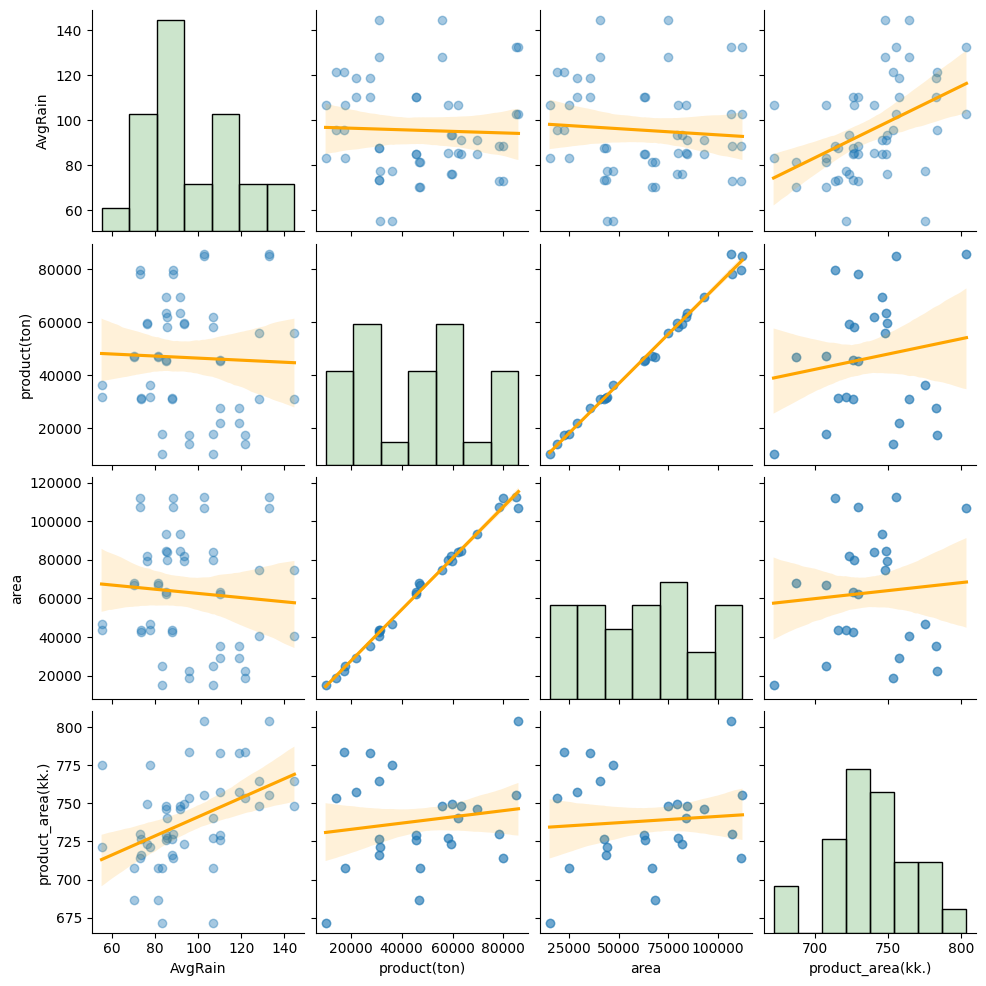

In [96]:
sns.pairplot(corn_full,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

#6.การแบ่งชุดข้อมูลออกเป็นชุดฝึกอบรมและชุดทดสอบ (Split data into training and testing sets)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
corn_full.shape

(52, 4)

In [99]:
X =corn_full[['area','AvgRain','product_area(kk.)']]  # Features
y = corn_full['product(ton)'] # target

In [100]:
X

,area,AvgRain,product_area(kk.)
0,22338.0,95.545920,783.51
1,18728.0,95.545920,753.47
2,22338.0,121.517528,783.51
3,18728.0,121.517528,753.47
4,106915.0,132.753153,803.73
5,112483.0,132.753153,755.46
6,106915.0,102.748194,803.73
7,112483.0,102.748194,755.46
8,35446.0,118.765812,782.66
9,29019.0,118.765812,757.47


In [101]:
y

0     17502.0
1     14111.0
2     17502.0
3     14111.0
4     85931.0
5     84976.0
6     85931.0
7     84976.0
8     27742.0
9     21981.0
10    27742.0
11    21981.0
12    55998.0
13    30993.0
14    55998.0
15    30993.0
16    78162.0
17    79968.0
18    78162.0
19    79968.0
20    17717.0
21    10077.0
22    17717.0
23    10077.0
24    59602.0
25    59320.0
26    59602.0
27    59320.0
28    45809.0
29    45574.0
30    45809.0
31    45574.0
32    63371.0
33    69597.0
34    63371.0
35    69597.0
36    47390.0
37    46785.0
38    47390.0
39    46785.0
40    30918.0
41    31248.0
42    30918.0
43    31248.0
44    62179.0
45    58179.0
46    62179.0
47    58179.0
48    36400.0
49    31640.0
50    36400.0
51    31640.0
Name: product(ton), dtype: float64

In [102]:
# แบ่งชุดข้อมูลฝึกสอน 80% และ ชุดข้อมูลทดสอบ 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41, 3)
(11, 3)
(41,)
(11,)


#7.การสร้างโมเดลจำลอง

โมเดลที่ใช้ : K-Nearest Neighbors Regression (KNN-R)

**หลักการทำงานของ KNN-R**
1.   เลือกค่า K: กำหนดค่า K ที่ต้องการ ซึ่งเป็นจำนวนขอข้อมูลที่ใกล้ที่สุดที่จะใช้ในการตัดสินใจ
2.   คำนวนระยะทาง: เพื่อคำนวณระยะทางระหว่างชุดข้อมูลทดสอบกับชุดข้อมูลฝึกฝน โดยใช้สมการคำนวณระยะทาง Distance
3.   หาข้อมูลที่ใกล้ที่สุด:

## ทำ Normalization ข้อมูล

In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

In [105]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
X_train_scaled

array([[0.07528415, 0.34095392, 0.84669042],
       [0.03825243, 0.34095392, 0.61892486],
       [0.07528415, 0.68946883, 0.84669042],
       [0.03825243, 0.68946883, 0.61892486],
       [0.94288293, 0.84024052, 1.        ],
       [1.        , 0.84024052, 0.63401319],
       [0.94288293, 0.43760176, 1.        ],
       [1.        , 0.43760176, 0.63401319],
       [0.20974724, 0.65254335, 0.84024566],
       [0.14381847, 0.65254335, 0.64925317],
       [0.20974724, 0.53820197, 0.84024566],
       [0.14381847, 0.53820197, 0.64925317],
       [0.61393665, 1.        , 0.57866404],
       [0.26208403, 1.        , 0.70141785],
       [0.61393665, 0.77945721, 0.57866404],
       [0.26208403, 0.77945721, 0.70141785],
       [0.94510894, 0.24615868, 0.43786489],
       [0.99499405, 0.24615868, 0.31988779],
       [0.94510894, 0.03553449, 0.43786489],
       [0.99499405, 0.03553449, 0.31988779],
       [0.10287842, 0.49103076, 0.27333384],
       [0.        , 0.49103076, 0.        ],
       [0.

In [107]:
X_test_scaled

array([[ 0.29368922,  0.23454548,  0.33649253],
       [ 0.28277461,  0.04611236,  0.4134506 ],
       [ 0.29368922,  0.04611236,  0.33649253],
       [ 0.70731607,  0.49103122,  0.52179847],
       [ 0.66696073,  0.49103122,  0.41883388],
       [ 0.70731607,  0.20520413,  0.52179847],
       [ 0.66696073,  0.20520413,  0.41883388],
       [ 0.32772558,  0.09786157,  0.78474486],
       [ 0.29592549,  0.09786157,  0.3772841 ],
       [ 0.32772558, -0.20192335,  0.78474486],
       [ 0.29592549, -0.20192335,  0.3772841 ]])

## สร้างโมเดล

In [108]:
knnr = KNeighborsRegressor(n_neighbors = 8, metric='euclidean')
knnr.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=8)

Text(0.5, 1.0, 'ELBOW PLOT')

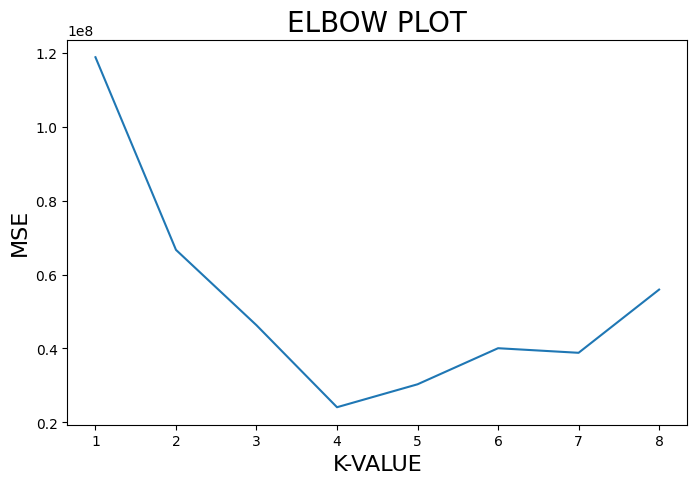

In [109]:
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(8,5))
k_list = np.arange(1, 9, 1)
knn_dict = {} # To store k and mae pairs
for i in k_list:
#Knn Model Creation
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(X_train_scaled, y_train)
    y_knn_pred = model_knn.predict(X_test_scaled)
#Storing MSE
    mse = mean_squared_error(y_test, y_knn_pred)
    knn_dict[i] = mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=16)
ax.set_ylabel('MSE' ,fontsize=16)
ax.set_title('ELBOW PLOT' ,fontsize=20)

## การพยากรณ์

**ชุดข้อมูลฝึกฝน (Training Set)**

In [110]:
y_pred_train = knnr.predict(X_train)
y_pred_train

array([17827.75 , 14851.75 , 17827.75 , 14851.75 , 82259.25 , 82259.25 ,
       82259.25 , 82259.25 , 26258.375, 21235.5  , 26258.375, 21235.5  ,
       55426.25 , 26258.375, 55426.25 , 26258.375, 82259.25 , 82259.25 ,
       82259.25 , 82259.25 , 17827.75 , 14851.75 , 17827.75 , 14851.75 ,
       59572.75 , 59572.75 , 59572.75 , 59572.75 , 46389.5  , 46389.5  ,
       46389.5  , 46389.5  , 62972.5  , 69554.75 , 62972.5  , 69554.75 ,
       46389.5  , 46389.5  , 46389.5  , 46389.5  , 26258.375])

**ชุดข้อมูลทดสอบ (Test Set)**

In [111]:
y_pred_test = knnr.predict(X_test)
y_pred_test

array([26258.375, 26258.375, 26258.375, 59572.75 , 59572.75 , 59572.75 ,
       59572.75 , 35668.125, 29740.5  , 35668.125, 29740.5  ])

In [112]:
y_pred = knnr.predict(X)
y_pred

array([17827.75 , 14851.75 , 17827.75 , 14851.75 , 82259.25 , 82259.25 ,
       82259.25 , 82259.25 , 26258.375, 21235.5  , 26258.375, 21235.5  ,
       55426.25 , 26258.375, 55426.25 , 26258.375, 82259.25 , 82259.25 ,
       82259.25 , 82259.25 , 17827.75 , 14851.75 , 17827.75 , 14851.75 ,
       59572.75 , 59572.75 , 59572.75 , 59572.75 , 46389.5  , 46389.5  ,
       46389.5  , 46389.5  , 62972.5  , 69554.75 , 62972.5  , 69554.75 ,
       46389.5  , 46389.5  , 46389.5  , 46389.5  , 26258.375, 26258.375,
       26258.375, 26258.375, 59572.75 , 59572.75 , 59572.75 , 59572.75 ,
       35668.125, 29740.5  , 35668.125, 29740.5  ])

**ชุดข้อมูล X (train+test)**

In [113]:
corn_full['Predicted_Prod'] = knnr.predict(X)
corn_full

<ipython-input-113-bc9ea81fba3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_full['Predicted_Prod'] = knnr.predict(X)


,AvgRain,product(ton),area,product_area(kk.),Predicted_Prod
0,95.545920,17502.0,22338.0,783.51,17827.750
1,95.545920,14111.0,18728.0,753.47,14851.750
2,121.517528,17502.0,22338.0,783.51,17827.750
3,121.517528,14111.0,18728.0,753.47,14851.750
4,132.753153,85931.0,106915.0,803.73,82259.250
5,132.753153,84976.0,112483.0,755.46,82259.250
6,102.748194,85931.0,106915.0,803.73,82259.250
7,102.748194,84976.0,112483.0,755.46,82259.250
8,118.765812,27742.0,35446.0,782.66,26258.375
9,118.765812,21981.0,29019.0,757.47,21235.500


In [114]:
absolute_dis_list = abs(y_pred - corn_full['product(ton)'])
result_df_knnr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': corn_full['product(ton)'], 'absolute_difference': absolute_dis_list})

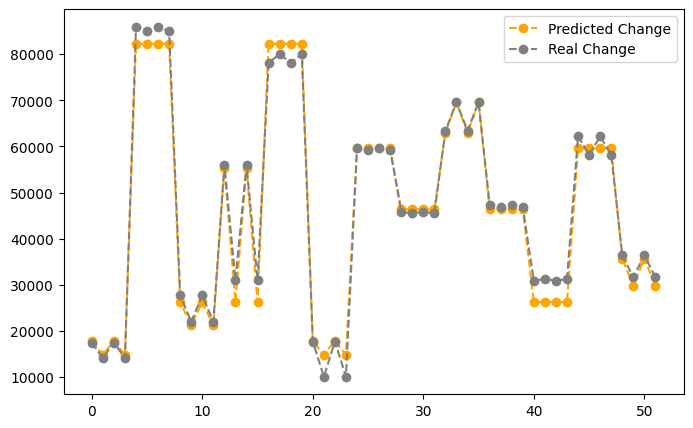

In [115]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change',
         linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(corn_full['product(ton)'], label = 'Real Change',
         linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

##การประเมินผลโมเดล (Model Evaluation)

**ชุดข้อมูลฝึกฝน (Training Set)**

In [116]:
KNNR_report = evaluate_model(y_train, y_pred_train, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.99
Mean Square Error: 5127141.16
Root Mean Square Error: 2264.32



Text(0, 0.5, 'Actual')

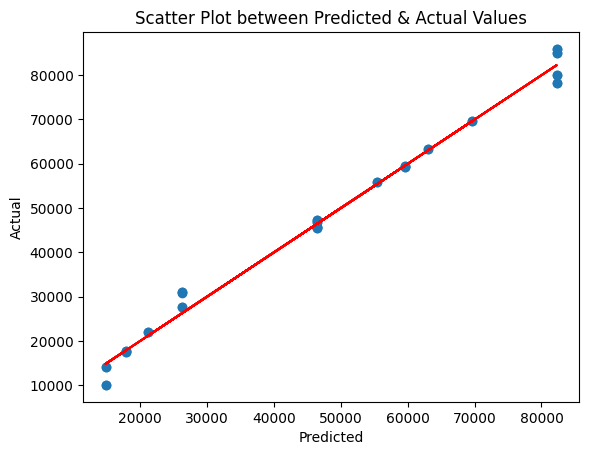

In [117]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ชุดข้อมูลทดสอบ (Test Set)**

In [118]:
evaluate_model(y_test, y_pred_test, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.95
Mean Square Error: 8842041.75
Root Mean Square Error: 2973.56



{'modelName': 'K-Nearest Neighbors Regression',
 'r2': 0.9504566134986415,
 'mse': 8842041.745738637,
 'rmse': 2973.557086342658}

Text(0, 0.5, 'Actual')

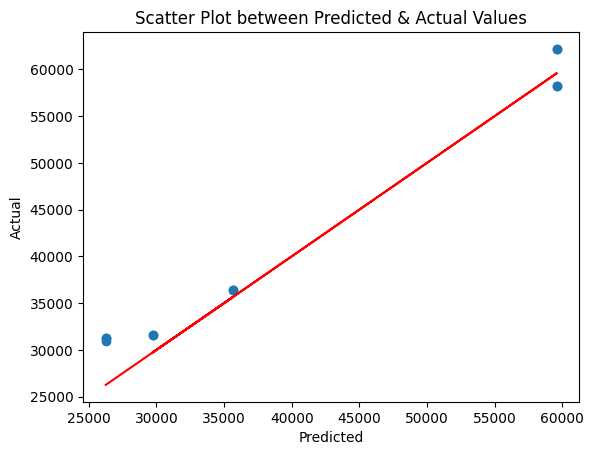

In [119]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Multiple Linear Regression (MLR)

###  สร้างโมเดล (Create Model)

In [120]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [121]:
# ค่าจุดตัดแกน Y ของสมการ
reg.intercept_

-37859.269793279105

In [122]:
# ค่าสัมประสิทธิ์การถดถอยของตัวตอบสนอง X
reg.coef_

array([ 0.74531065, 16.24887326, 48.60709422])

###การพยากรณ์ (Predictions)

**ชุดข้อมูลฝึกฝน (Training Set)**

In [123]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([18426.13749543, 14275.40893155, 18848.14685468, 14697.4182908 ,
       83049.68755738, 84853.31282911, 82562.14078273, 84365.76605447,
       28531.65056612, 22517.12630277, 28393.19699663, 22378.67273328,
       56642.16404244, 31864.95753712, 56375.11342968, 31597.90692436,
       78888.32884078, 81756.44815495, 78633.28846056, 81501.40777473,
       16937.07956837,  7710.07329355, 16552.80561066,  7325.79933584,
       59361.56992345, 59935.13824491, 59081.43243661, 59655.00075807,
       46246.80259425, 45953.76548063, 45839.3050872 , 45546.26797358,
       63110.84079118, 69408.10037611, 63007.95628874, 69305.21587367,
       47768.19127922, 47612.06744561, 47587.57597432, 47431.45214071,
       30595.27896374])

**ชุดข้อมูลทดสอบ (Test Set)**

In [124]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([30894.92749102, 30367.10927351, 30666.75780079, 62445.87414902,
       58853.73770483, 62099.77214944, 58507.63570525, 36076.01197433,
       31153.40370985, 35713.00874939, 30790.4004849 ])

ชุดข้อมูล X (train+test)

In [125]:
y_pred = reg.predict(X)
y_pred

array([18426.13749543, 14275.40893155, 18848.14685468, 14697.4182908 ,
       83049.68755738, 84853.31282911, 82562.14078273, 84365.76605447,
       28531.65056612, 22517.12630277, 28393.19699663, 22378.67273328,
       56642.16404244, 31864.95753712, 56375.11342968, 31597.90692436,
       78888.32884078, 81756.44815495, 78633.28846056, 81501.40777473,
       16937.07956837,  7710.07329355, 16552.80561066,  7325.79933584,
       59361.56992345, 59935.13824491, 59081.43243661, 59655.00075807,
       46246.80259425, 45953.76548063, 45839.3050872 , 45546.26797358,
       63110.84079118, 69408.10037611, 63007.95628874, 69305.21587367,
       47768.19127922, 47612.06744561, 47587.57597432, 47431.45214071,
       30595.27896374, 30894.92749102, 30367.10927351, 30666.75780079,
       62445.87414902, 58853.73770483, 62099.77214944, 58507.63570525,
       36076.01197433, 31153.40370985, 35713.00874939, 30790.4004849 ])

In [126]:
absolute_dis_list = abs(y_pred - corn_full['product(ton)'])
result_df_mlr = pd.DataFrame({'y_pred': y_pred, 'complete_Cassava_prod': corn_full['product(ton)'], 'absolute_difference': absolute_dis_list})

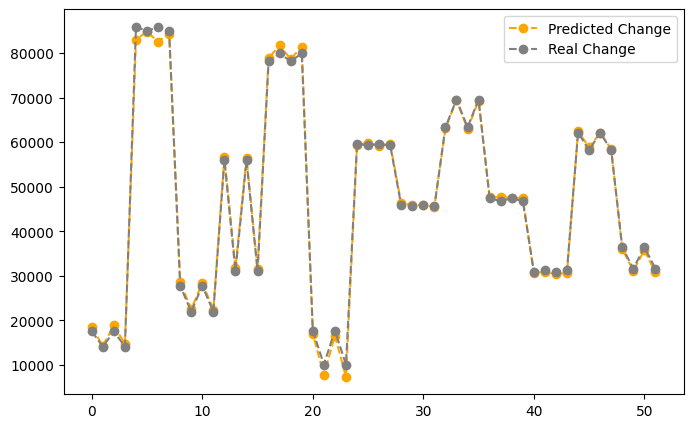

In [127]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change', linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(corn_full['product(ton)'], label = 'Real Change', linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

### การประเมินผลโมเดล (Model Evaluation)

**ชุดข้อมูลฝึกฝน (Training Set)**

In [128]:
MLR_report = evaluate_model(y_train, y_pred_train, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 1.0
Mean Square Error: 1232983.32
Root Mean Square Error: 1110.4



Text(0, 0.5, 'Actual')

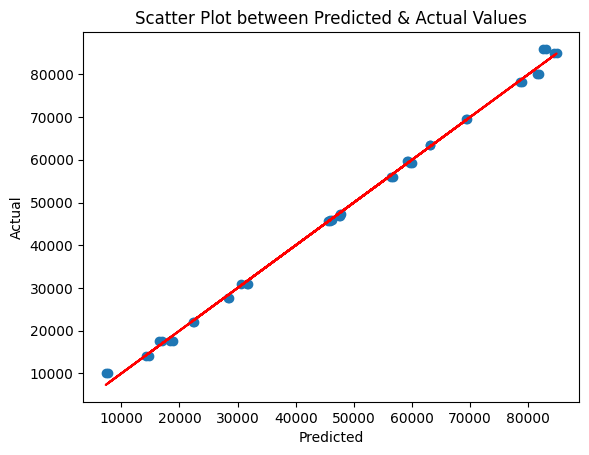

In [129]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ชุดข้อมูลทดสอบ (Test Set)**

In [130]:
evaluate_model(y_test, y_pred_test, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 1.0
Mean Square Error: 267479.55
Root Mean Square Error: 517.18



{'modelName': 'Multiple Linear Regression',
 'r2': 0.998501268926002,
 'mse': 267479.5499004195,
 'rmse': 517.1842514041002}

Text(0, 0.5, 'Actual')

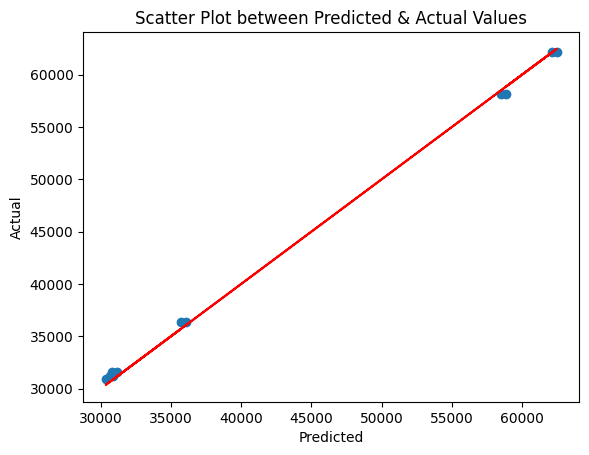

In [131]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 8.บทสรุปสุดท้ายและการเปรียบเทียบ

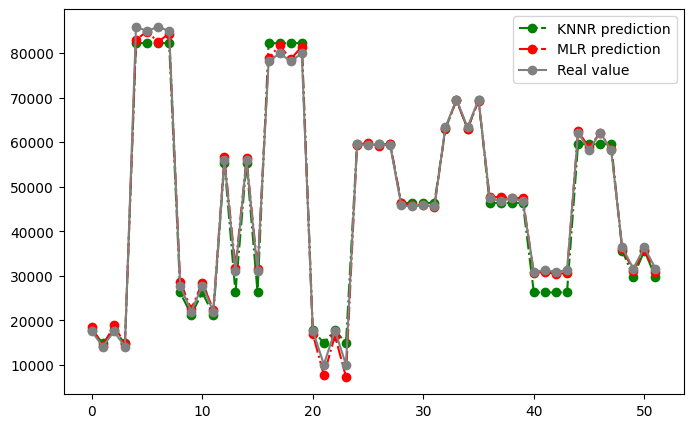

In [132]:
plt.figure(figsize = (8, 5))
plt.plot(result_df_knnr['y_pred'], label = 'KNNR prediction', linestyle="-.",marker='o', color='green') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(result_df_mlr['y_pred'], label = 'MLR prediction', linestyle="-.",marker='o', color='red') # การเปลี่ยนแปลงที่แท้จริง)
plt.plot(corn_full['product(ton)'], label = 'Real value', linestyle="-", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง)
plt.legend()

In [133]:
KNNR_report['modelName']

'K-Nearest Neighbors Regression'

In [134]:
def print_rep(report) :
  print('Model :', report['modelName'])
  print('R2 :', round(report['r2'], 2))
  print('MSE :', round(report['mse'], 2))
  print('RMSE :', round(report['rmse'], 2))

print_rep(KNNR_report)
print('--------------------------------------')
print_rep(MLR_report)

Model : K-Nearest Neighbors Regression
R2 : 0.99
MSE : 5127141.16
RMSE : 2264.32
--------------------------------------
Model : Multiple Linear Regression
R2 : 1.0
MSE : 1232983.32
RMSE : 1110.4
